In [1]:
import Datos.Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import matplotlib.pyplot as plt

Datos

In [2]:
import importlib
importlib.reload(data)
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = data.get_mnist_data(dataset="fashion")

Usando fashion como dataset


Enconder decoder


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


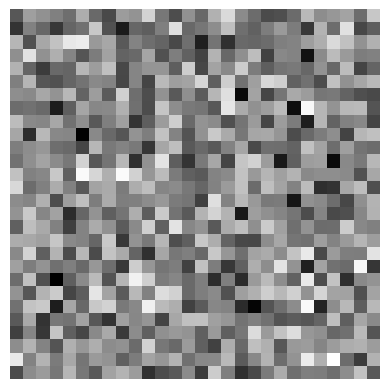

In [3]:
import numpy as np
importlib.reload(Encoder)
importlib.reload(Decoder)

en = Encoder.build_enconder(intermediate_dim=256,latent_dim=128)
de = Decoder.build_decoder(intermediate_dim=256,latent_dim=128)


img_sample = np.expand_dims(x_train[0], axis=0)# shape (1, 28, 28)
cond_sample = np.expand_dims(y_train[0], axis=0) 
[z, z_mean, z_log_var] = en.predict([img_sample,cond_sample])

img_recons = de.predict([z,cond_sample])

plt.imshow(img_recons[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()


In [4]:
import tensorflow as tf
from keras.callbacks import EarlyStopping

importlib.reload(cVAE)
original_dim = 28*28
beta = 1.0

train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))
#train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
train_dataset = train_dataset.batch(128)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
val_dataset = val_dataset.batch(128)


cvae = cVAE.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=1)
cvae.compile(optimizer=tf.keras.optimizers.Adam())



In [5]:
cvae.fit(train_dataset,
        epochs=10,
        batch_size=128,
        validation_data=val_dataset,
        callbacks=[early_stopping]
         )

Epoch 1/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - kl_loss: 4.0684 - loss: 62.6879 - reconstruction_loss: 58.6195 - val_kl_loss: 5.9952 - val_loss: 35.4188 - val_reconstruction_loss: 29.4872
Epoch 2/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 5.8554 - loss: 33.8197 - reconstruction_loss: 27.9643 - val_kl_loss: 5.0766 - val_loss: 30.5857 - val_reconstruction_loss: 25.6289
Epoch 3/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 4.9908 - loss: 29.7239 - reconstruction_loss: 24.7331 - val_kl_loss: 4.5980 - val_loss: 27.6856 - val_reconstruction_loss: 23.1474
Epoch 4/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 4.5687 - loss: 27.1827 - reconstruction_loss: 22.6140 - val_kl_loss: 4.5250 - val_loss: 26.3833 - val_reconstruction_loss: 21.9164
Epoch 5/10
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl_loss: 4.4644 - loss: 25.9581 - reconstruction_loss: 21.4936 - val_kl_loss: 4.5003 - val_loss: 25.5259 - val_reconstruction_loss: 21.0956
Epoch 6/10
430/430 ━━━━━━━━━━━

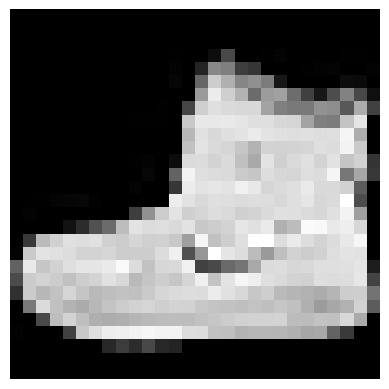

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
(1, 784)


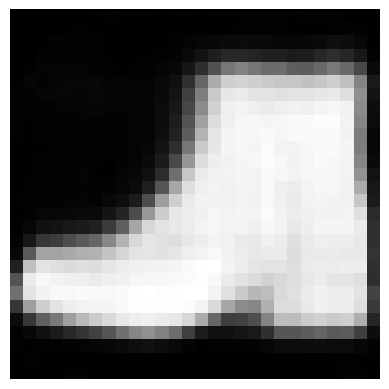

In [6]:
x_input = x_train[:1]         # 1 imagen (shape: (1, 28, 28))
cond_input = y_train[:1]      # su condición (shape: (1, 10))

plt.imshow(x_input[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()

z_mean, z_log_var, z = cvae.encoder.predict([x_input, cond_input])


# Paso por el decoder para reconstrucción
reconstructed = cvae.decoder.predict([z, cond_input])
print(reconstructed.shape)
plt.imshow(reconstructed[0].reshape(28, 28), cmap="gray")
plt.axis("off")
plt.show()



In [7]:
'''
# Tomá una imagen del conjunto de test
indices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0

for i in indices_de_testeo:

    imagen = x_train[i]
    #plt.imshow(imagen)
    #plt.show()
    # Visualizá cómo se reconstruye con todas las condiciones posibles
    vis.condiciones(cvae, imagen)
# Ver 10 variantes generadas para la clase 3
for i in range(10):
    
    vis.variantes(cvae, condicion_id=i, num_variantes=10)
'''

'\n# Tomá una imagen del conjunto de test\nindices_de_testeo=[1, 3, 5, 7, 2, 0, 13, 15, 17, 4] # inidices donde para que x_train[inidicies] sea 0 1 2 3 4 5 6 7 8 9 0\n\nfor i in indices_de_testeo:\n\n    imagen = x_train[i]\n    #plt.imshow(imagen)\n    #plt.show()\n    # Visualizá cómo se reconstruye con todas las condiciones posibles\n    vis.condiciones(cvae, imagen)\n# Ver 10 variantes generadas para la clase 3\nfor i in range(10):\n    \n    vis.variantes(cvae, condicion_id=i, num_variantes=10)\n'

# Predictores

In [8]:
import models.Predictor as predictores
importlib.reload(predictores)

predictor = predictores.build_predictor() 

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

predictor.compile(optimizer, loss="categorical_crossentropy")

#x_rain_conv = np.reshape(x_train,(28,28,1)) 
predictor.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=5,
    validation_data=(x_val, y_val)  # Include validation data
#    callbacks=[cp_callback_predictor_C2, early_stopping]  # Add early_stopping to callbacks
)

Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer (ReshapeLayer)    │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 50,378 (196.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.8018 - val_loss: 0.5919
Epoch 2/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.4100 - val_loss: 0.3196
Epoch 3/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.3495 - val_loss: 0.3632
Epoch 4/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.3241 - val_loss: 0.2858
Epoch 5/5
430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.2946 - val_loss: 0.2830


(784,)


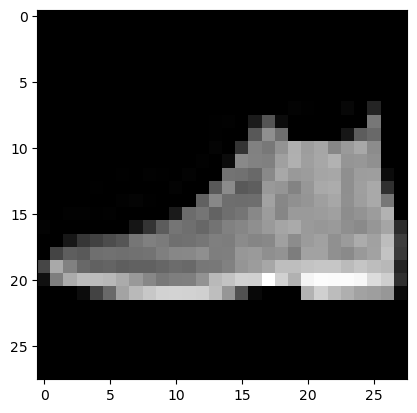

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Digito predicho: 9


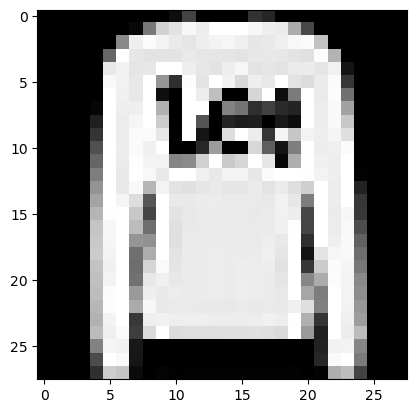

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Digito predicho: 2


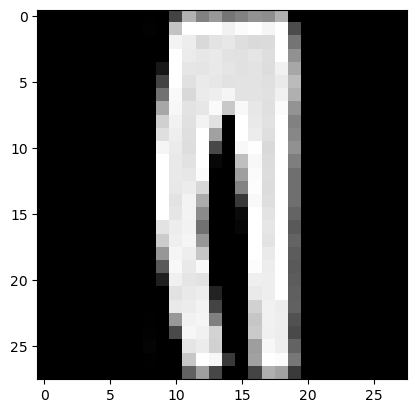

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Digito predicho: 1


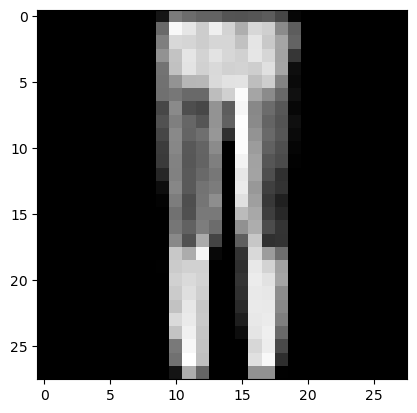

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 1


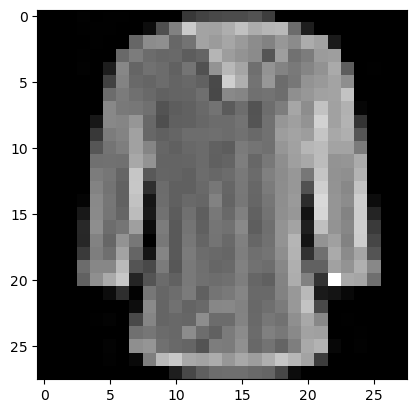

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Digito predicho: 6


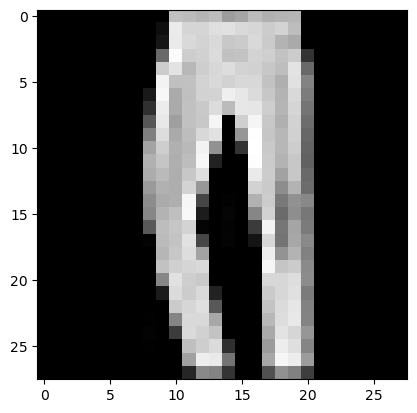

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 1


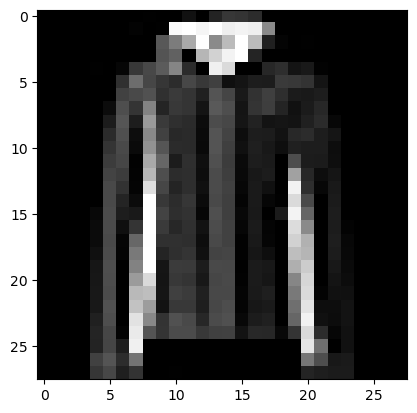

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Digito predicho: 4


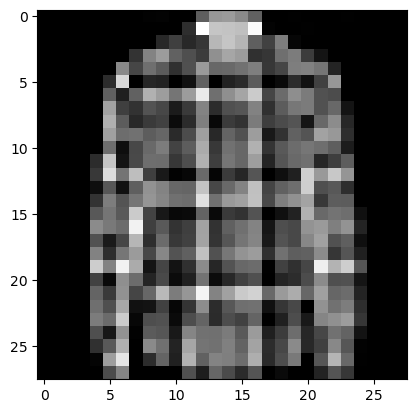

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Digito predicho: 6


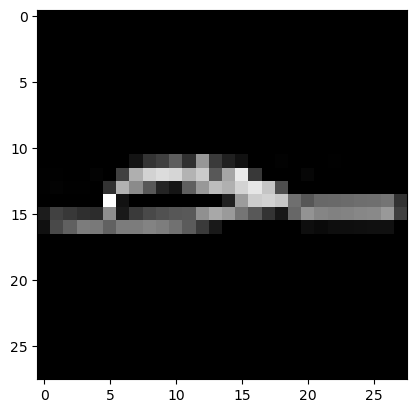

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Digito predicho: 5


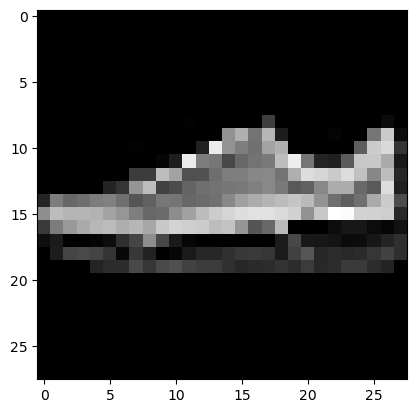

dentro del loop
(784,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Digito predicho: 7


In [9]:
print(x_test[0].shape)
for i in range(10):
    plt.imshow(x_test[i].reshape(28, 28),cmap="gray")
    plt.show()
    print("dentro del loop")
    print(x_test[i].shape)
    print(f"Digito predicho: {np.argmax( predictor.predict(x_test[i].reshape(1, 784)))}")

# Pruebas de separacion de digitos


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
tf.Tensor(
[18.096045 19.62832  11.349361  8.557708 18.704819 14.482858 18.754608
 17.898497  5.885144  8.179159], shape=(10,), dtype=float32)
tf.Tensor(
[12.926054  13.225346  14.013749   9.968197  13.462596  13.3105
 17.91689   10.308972   6.4725947  8.954673 ], shape=(10,), dtype=float32)
tf.Tensor(
[15.511049  16.426834  12.681555   9.262953  16.083708  13.896679
 18.335749  14.103735   6.1788692  8.5669155], shape=(10,), dtype=float32)
tf.Tensor(
[ 8.528989   5.8442893 18.275656   8.694064   9.693371   6.1351047
 12.844678   6.065577  15.005016  13.579001 ], shape=(10,), dtype=float32)
tf.Tensor(
[ 7.1764374  4.8110623 18.40849    9.598378   7.888033   5.8026686
 11.044188   4.73602

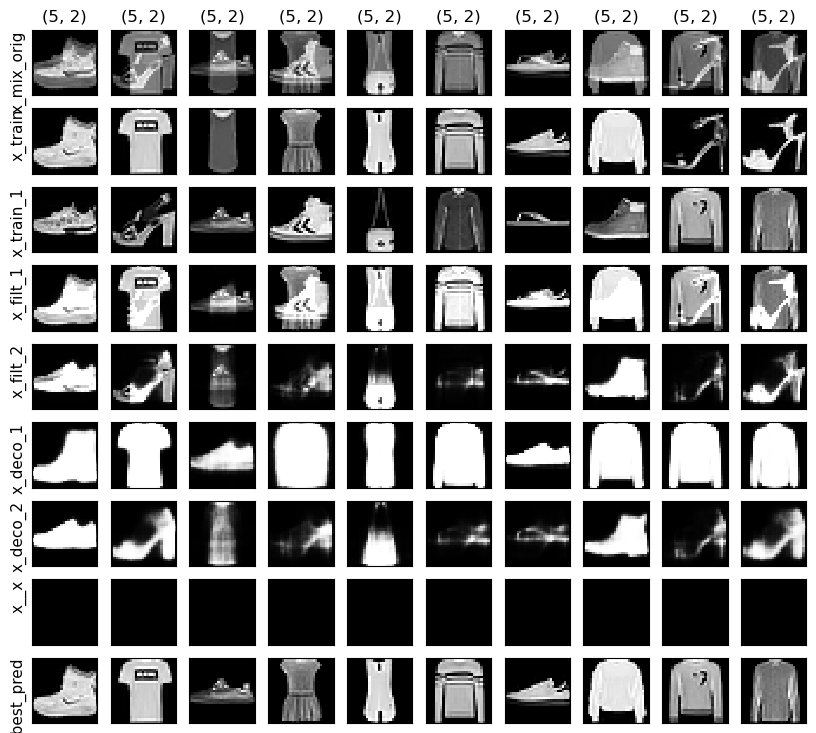

(<tf.Tensor: shape=(), dtype=float32, numpy=15.103408813476562>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.5255815982818604>)

In [10]:
import inferencias.inferencia as inf
import importlib
importlib.reload(inf)

n_pictures=10

inf.separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                    y_train_1[0:n_pictures],cvae,predictor,num_col=n_pictures,show_graph=True,Iterations=5 )